In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
X = np.empty((100,2))
X[:, 0] = np.random.uniform(0., 100., size = 100)
X[:, 1] = 0.75 * X[:, 0] + 3. + np.random.normal(0., 10., size = 100)
#之所以设置成 线性效果，是因为这样 降维 的效果好

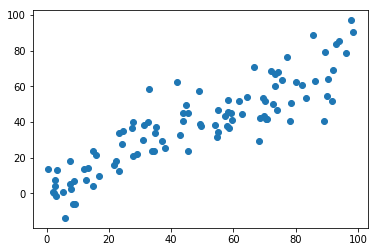

In [5]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

### demean

In [6]:
def demean(X):
    return X - np.mean(X, axis = 0) #需要减去的每一列的均值

In [8]:
X_demean = demean(X)

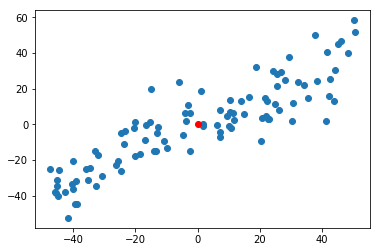

In [12]:
plt.scatter(X_demean[:, 0], X_demean[:, 1])
plt.scatter(0,0, color = 'r')
plt.show()
#可见分布的中心 现在在(0,0)

In [13]:
np.mean(X_demean[:, 0])

1.3500311979441903e-14

In [14]:
np.mean(X_demean[:, 1])

-6.1106675275368615e-15

### 梯度上升法

In [15]:
def f(w, X):
    return np.sum((X.dot(w)**2)) / len(X)

In [16]:
def df_math(w, X):
    return X.T.dot(X.dot(w)) * 2. / len(X)

In [26]:
def df_debug(w, X, epsilon = 0.0001):
    res = np.empty(len(w))
    for i in range(len(w)):
        w_1 = w.copy()
        w_1[i] += epsilon
        w_2 = w.copy()
        w_2[i] -= epsilon
        res[i] = (f(w_1, X) - f(w_2, X)) / (2. * epsilon)
    return res

In [27]:
def direction(w):
    return w / np.linalg.norm(w) #求模：np.linalg.norm()

def gradient_ascent(df, X, initial_w, eta, n_iters = 1e4, epsilon = 1e-8):
    w = direction(initial_w)
    cur_iter = 0
    while cur_iter <= n_iters:
        gradient = df(w, X)
        last_w = w
        w = w + (+1) * eta * gradient #注意w必须是单位向量，所以我们每一步循环需要保证w还是单位向量
        w = direction(w) #TODO: 为什么不在gradient = df(w, X) 这一行来进行direction()
        if(abs( f(w, X) - f(last_w, X) ) < epsilon ):
            break
        cur_iter += 1
        
    return w

### 注意事项1： 如果没有将 w 更新为单位向量，会怎么样？
1. 不均一化，w的模很大概率会大于1，导致搜索的过程不顺畅
2. 不顺畅的话，需要eta小，eta小的话需要的迭代次数n_iters就会大，搜索慢
3. 所以还是遵循 我们假设的条件（w为单位向量），这样我们的搜索会更快。 因为 X.dot(w) = ||X|| * ||w|| * cos($\theta$), w为单位向量时候，||w|| = 1

In [28]:
initial_w = np.random.random(X.shape[1])
initial_w

array([0.8654921 , 0.91889805])

### 注意事项2： PCA 中 w 的初始值不能为0：
 1. 在线性回归中，我们的初始theta都是0，可是这里初始w不能是0
 2. 因为当w = 0的时候，目标函数f()会处于极小值，导数也是0. 所以我们不能通过这个等于0的导数得到下一个导数。
 

### 注意事项3： 不能使用StandardScaler来标准化数据
1. 本身PCA的的目的就是，映射到一条直线，在这条直线上所有的映射点 方差最大
2. 但是如果用 StandardScaler来标准化数据 后，就会导致我们的点的方差为1，即便你映射到其他点，方差依旧为1.（因为标准化之后分布会像一个 标准圆，你以原点花任意一条直线，所有映射点在这条直线上的方差都为1）
3. 我们标准化只做了 demean(), 不能做什么devar()

In [29]:
eta = 0.001

In [30]:
gradient_ascent(df_debug, X_demean, initial_w, eta)

array([0.77756764, 0.6287993 ])

In [31]:
gradient_ascent(df_math, X_demean, initial_w, eta)

array([0.77756764, 0.6287993 ])

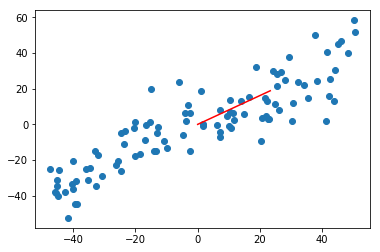

In [33]:
w = gradient_ascent(df_math, X_demean, initial_w, eta)
plt.scatter(X_demean[:, 0], X_demean[:, 1])
plt.plot([0, w[0]*30],[0, w[1]*30], color = 'r')
plt.show()
#可见分布的中心 现在在(0,0)

### 当分布就是在一条直线（一个维度上）的时候，我们的gradient_ascent() 求出来的就是这条直线的斜率
1. 一般化（有多个维度）：求出的是第一主成分
2. 特殊（只有一个维度）：求得就是斜率
3. 例子见下：

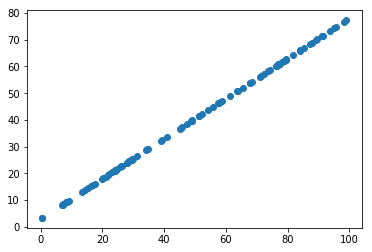

In [46]:
X2 = np.empty((100,2))
X2[:, 0] = np.random.uniform(0., 100., size = 100)
X2[:, 1] = 0.75 * X2[:, 0] + 3.
plt.scatter(X2[:, 0], X2[:, 1])
plt.show()

In [48]:
X2_demean = demean(X2)
w2 = gradient_ascent(df_math, X2_demean, initial_w, eta)
w2

array([0.79999955, 0.60000059])

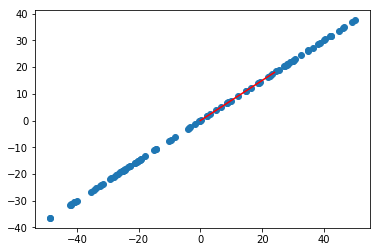

In [49]:
plt.scatter(X2_demean[:, 0], X2_demean[:, 1])
plt.plot([0, w2[0]*30],[0, w2[1]*30], color = 'r')
plt.show()

### 以上都是解释如何求出第一主成分, 但是我们还需要求出其他主成分